## Final Project Submission

Please fill out:
* Student name: **Nicholas Donovan**
* Student pace: self paced / **part time** / full time
* Scheduled project review date/time: **2/7/19 @ 2:15pm**
* Instructor name: **Jeff Herman**
* Blog post URL: https://medium.com/@nicodonovan/fighting-fraud-flatiron-data-science-project-1-280b63249253


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

# OSEMN Model

For our current project, our team decided on using the OSEMN model as the backbone for our analysis. We felt that it was the most straightforward approach, giving us a lot of flexibility and versatility to apply our findings to a wide-ranging audience. 

# O: Obtain
We will be using the King County House Sales dataset to predict the sale price of houses as accurately as possible.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
# loading the data into a dataframe
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
len(df)

21597

21 total columns

21,597 total entries

# S: Scrub 
Here we will be further investigating our dataset. This includes identifying and removing null values, replacing values, distinguishing between continuous and categorical columns and converting formats. As well as any other issues that may come up during this exploratory process. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Because modeling is an iterative process, to reduce runtimes as we continuously train our model, we need to subset our data. To do this, we took a random sample of our data using the sample function in pandas. Our subset (sdf) contains a random 30% of our data. 

In [4]:
sdf = df.sample(frac=0.3)

In [5]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479 entries, 20668 to 661
Data columns (total 21 columns):
id               6479 non-null int64
date             6479 non-null object
price            6479 non-null float64
bedrooms         6479 non-null int64
bathrooms        6479 non-null float64
sqft_living      6479 non-null int64
sqft_lot         6479 non-null int64
floors           6479 non-null float64
waterfront       5784 non-null float64
view             6459 non-null float64
condition        6479 non-null int64
grade            6479 non-null int64
sqft_above       6479 non-null int64
sqft_basement    6479 non-null object
yr_built         6479 non-null int64
yr_renovated     5383 non-null float64
zipcode          6479 non-null int64
lat              6479 non-null float64
long             6479 non-null float64
sqft_living15    6479 non-null int64
sqft_lot15       6479 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 1.1+ MB


In [6]:
to_drop = ["id", "date", "zipcode", "lat", "long"]
sdf.drop(to_drop, axis=1, inplace=True)

The "id" and "date" columns were dropped as they will not be used for this analysis and model building. Additionally, after multiple attempts to include the "zipcode", "lat" and "long" columns, I decided that they provided too large of a technical challenge without any meaningful improvment to the model. In short, they created too many dummy categories during the one-hot encoding stage to process efficently.  

Based on our findings from the dataframe's metadata, I noticed that only two columns were cast at strings (object). "Date" seemed to be correctly cast as a string, but "sqft_basement" did not seem appropriate as a string, so it was further inspected. 

In [7]:
sdf.sqft_basement.unique()

array(['900.0', '0.0', '600.0', '980.0', '430.0', '240.0', '390.0',
       '260.0', '760.0', '770.0', '990.0', '590.0', '500.0', '700.0',
       '290.0', '800.0', '?', '180.0', '1000.0', '440.0', '810.0',
       '550.0', '690.0', '970.0', '820.0', '790.0', '200.0', '1480.0',
       '1790.0', '950.0', '1100.0', '890.0', '1300.0', '460.0', '750.0',
       '1200.0', '940.0', '740.0', '620.0', '1360.0', '450.0', '1430.0',
       '870.0', '170.0', '400.0', '580.0', '570.0', '1720.0', '1460.0',
       '330.0', '840.0', '670.0', '530.0', '510.0', '1150.0', '560.0',
       '730.0', '1110.0', '520.0', '140.0', '630.0', '1130.0', '490.0',
       '910.0', '1060.0', '680.0', '250.0', '1940.0', '370.0', '160.0',
       '540.0', '780.0', '720.0', '1950.0', '360.0', '480.0', '830.0',
       '1010.0', '110.0', '1230.0', '1600.0', '850.0', '860.0', '660.0',
       '120.0', '1020.0', '1420.0', '1400.0', '1830.0', '300.0', '470.0',
       '710.0', '340.0', '1450.0', '420.0', '210.0', '861.0', '1050.0',
 

In [8]:
sdf['sqft_basement'].value_counts()

0.0       3874
?          150
500.0       62
800.0       56
600.0       56
900.0       54
700.0       54
1000.0      46
300.0       46
400.0       39
750.0       32
530.0       32
450.0       31
480.0       31
780.0       31
720.0       30
860.0       29
1100.0      29
550.0       27
290.0       27
850.0       25
670.0       25
200.0       24
920.0       24
520.0       24
950.0       23
1010.0      23
1040.0      22
360.0       22
730.0       22
          ... 
2020.0       1
666.0        1
1930.0       1
768.0        1
1760.0       1
1008.0       1
1910.0       1
235.0        1
265.0        1
2200.0       1
3500.0       1
3260.0       1
1275.0       1
1860.0       1
2070.0       1
518.0        1
248.0        1
2030.0       1
2110.0       1
274.0        1
2160.0       1
2150.0       1
1390.0       1
2390.0       1
1940.0       1
1810.0       1
2490.0       1
3480.0       1
1730.0       1
1610.0       1
Name: sqft_basement, Length: 227, dtype: int64

The column "sqft_basement" seems to be incorrectly cast as a string type despite containing numerical data. This was due to the fact that there are 136 entries that have "?" as their value, symbolizing unknown data for this column. I decided to drop these values as it only constitutes about a 2% reduction. 

In [9]:
to_drop = sdf[sdf['sqft_basement'] == '?']
sdf.drop(to_drop.index, axis=0, inplace=True)
sdf.sqft_basement = sdf.sqft_basement.astype('float')

In [10]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6329 entries, 20668 to 661
Data columns (total 16 columns):
price            6329 non-null float64
bedrooms         6329 non-null int64
bathrooms        6329 non-null float64
sqft_living      6329 non-null int64
sqft_lot         6329 non-null int64
floors           6329 non-null float64
waterfront       5643 non-null float64
view             6310 non-null float64
condition        6329 non-null int64
grade            6329 non-null int64
sqft_above       6329 non-null int64
sqft_basement    6329 non-null float64
yr_built         6329 non-null int64
yr_renovated     5270 non-null float64
sqft_living15    6329 non-null int64
sqft_lot15       6329 non-null int64
dtypes: float64(7), int64(9)
memory usage: 840.6 KB


In [11]:
sdf.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront        686
view               19
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     1059
sqft_living15       0
sqft_lot15          0
dtype: int64

Now we are checking to see if the data contains any null values. And by the looks of our results, we can see that "waterfront", "view" and "yr_renovated" all contain null values. We will inspect each individually. 

In [12]:
sdf.view.value_counts()

0.0    5662
2.0     275
3.0     160
1.0     111
4.0     102
Name: view, dtype: int64

In [13]:
sdf['view'].fillna(0, inplace=True)

In [14]:
sdf.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront        686
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     1059
sqft_living15       0
sqft_lot15          0
dtype: int64

For the "views" column, I decided to replace the null values with the most common value. For "views", the most common value was 0.0. Since there were only 15 total null values for this column and 0.0 had an order of magnitude more counts than the other values, I felt this would minimally skew the data, if at all. 

In [15]:
sdf.waterfront.unique()

array([ 0.,  1., nan])

In [16]:
sdf.waterfront.value_counts()

0.0    5600
1.0      43
Name: waterfront, dtype: int64

In [17]:
sdf.waterfront = sdf.waterfront.astype("str")
sdf['waterfront'].fillna('nan')

20668    0.0
10575    0.0
1851     0.0
20309    1.0
14111    0.0
11842    0.0
1980     0.0
2178     0.0
7393     0.0
8424     0.0
2916     0.0
16346    0.0
17333    nan
208      0.0
14546    nan
18169    0.0
5377     0.0
11903    0.0
10631    0.0
7704     0.0
3899     0.0
12168    0.0
16402    0.0
12391    0.0
3255     0.0
19182    0.0
13722    0.0
2804     0.0
5949     0.0
18400    nan
        ... 
486      0.0
19638    0.0
21049    0.0
5820     0.0
5350     0.0
16126    nan
12359    nan
3565     nan
19419    nan
1761     0.0
14710    0.0
16483    0.0
19571    0.0
1419     0.0
12868    0.0
8626     0.0
21494    0.0
2458     0.0
18323    0.0
941      nan
6493     nan
20949    0.0
11478    nan
5132     0.0
6420     0.0
392      0.0
4300     0.0
8431     0.0
14273    nan
661      0.0
Name: waterfront, Length: 6329, dtype: object

In [18]:
sdf.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     1059
sqft_living15       0
sqft_lot15          0
dtype: int64

For the "waterfront" column, I noticed that it was incorrectly cast an numerical column despite being categorical data. So I changed its type from float to string. This allowed me to treat the null values as its own category.  

In [19]:
sdf.yr_renovated.unique()

array([  nan,    0., 2004., 1983., 2000., 1948., 2007., 2005., 1988.,
       2003., 2013., 1997., 1992., 1963., 1999., 2014., 1986., 1955.,
       1990., 1982., 1994., 2006., 2001., 2002., 1970., 2010., 1984.,
       1998., 1993., 1995., 2009., 1977., 2008., 1960., 1985., 2015.,
       1991., 1964., 1958., 2011., 1957., 1945., 2012., 1996., 1987.,
       1953., 1979., 1965., 1956., 1975., 1972., 1973., 1981., 1940.,
       1944., 1989., 1980.])

In [20]:
sdf.yr_renovated.value_counts()

0.0       5049
2014.0      29
2007.0      13
2005.0      11
2000.0      11
2008.0      10
2003.0       9
2004.0       9
2010.0       6
1994.0       6
2002.0       6
1998.0       6
2009.0       5
1986.0       5
1990.0       5
1993.0       4
1983.0       4
2015.0       4
1995.0       4
2006.0       4
2011.0       4
1997.0       4
1982.0       4
1964.0       3
1987.0       3
1985.0       3
1988.0       3
2001.0       3
1977.0       3
2013.0       3
1999.0       3
1980.0       2
1996.0       2
1991.0       2
2012.0       2
1992.0       2
1984.0       2
1960.0       2
1970.0       2
1963.0       2
1975.0       1
1958.0       1
1953.0       1
1981.0       1
1948.0       1
1944.0       1
1957.0       1
1972.0       1
1965.0       1
1940.0       1
1979.0       1
1956.0       1
1973.0       1
1945.0       1
1989.0       1
1955.0       1
Name: yr_renovated, dtype: int64

In [21]:
sdf.yr_renovated.describe()

count    5270.000000
mean       83.757116
std       400.390758
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2015.000000
Name: yr_renovated, dtype: float64

In [22]:
to_drop = ["yr_renovated"]
sdf.drop(to_drop, axis=1, inplace=True)
sdf.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

I decided to drop the "yr_renovated" column. 5019/6343 in our data were not renovated. An additional 1121 contained null values, which I did not understand how to deal with correctly. This left us with only 203 rows with actual years in which they were renovated. This data did not seem like it would contribute meaningfully to our model. 

In [23]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6329 entries, 20668 to 661
Data columns (total 15 columns):
price            6329 non-null float64
bedrooms         6329 non-null int64
bathrooms        6329 non-null float64
sqft_living      6329 non-null int64
sqft_lot         6329 non-null int64
floors           6329 non-null float64
waterfront       6329 non-null object
view             6329 non-null float64
condition        6329 non-null int64
grade            6329 non-null int64
sqft_above       6329 non-null int64
sqft_basement    6329 non-null float64
yr_built         6329 non-null int64
sqft_living15    6329 non-null int64
sqft_lot15       6329 non-null int64
dtypes: float64(5), int64(9), object(1)
memory usage: 791.1+ KB


Some categorical data was incorrectly encoded as integers/floats. These were converted to strings to better represent the categorical nature and be one-hot encoded later on in the process. 

In [24]:
sdf.bedrooms = sdf.bedrooms.astype("str")
sdf.bathrooms = sdf.bathrooms.astype("str")
sdf.floors = sdf.floors.astype("str")
sdf.view = sdf.view.astype("str")
sdf.condition = sdf.condition.astype("str")
sdf.grade = sdf.grade.astype("str")
sdf.yr_built = sdf.yr_built.astype("str")
#sdf.zipcode = sdf.zipcode.astype("str")
#sdf.lat = sdf.lat.astype("str")
#sdf.long = sdf.long.astype("str")

In [25]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6329 entries, 20668 to 661
Data columns (total 15 columns):
price            6329 non-null float64
bedrooms         6329 non-null object
bathrooms        6329 non-null object
sqft_living      6329 non-null int64
sqft_lot         6329 non-null int64
floors           6329 non-null object
waterfront       6329 non-null object
view             6329 non-null object
condition        6329 non-null object
grade            6329 non-null object
sqft_above       6329 non-null int64
sqft_basement    6329 non-null float64
yr_built         6329 non-null object
sqft_living15    6329 non-null int64
sqft_lot15       6329 non-null int64
dtypes: float64(2), int64(5), object(8)
memory usage: 791.1+ KB


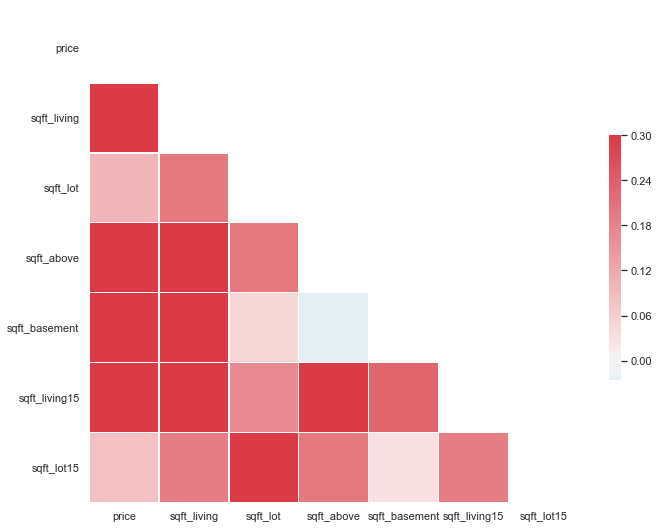

In [26]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = sdf.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
abs(sdf.corr()) > 0.75

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False
sqft_living,False,True,False,True,False,True,False
sqft_lot,False,False,True,False,False,False,False
sqft_above,False,True,False,True,False,False,False
sqft_basement,False,False,False,False,True,False,False
sqft_living15,False,True,False,False,False,True,False
sqft_lot15,False,False,False,False,False,False,True


Based on the heatmap and the correlation matrix (0.75 was used as a cutoff because generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation), "sqft_living" is highly correlated with "sqft_living15" and "sqft_above". To solve this issue, the column was removed from our data. The rest of the data did not show any high correlation amongst each other.

In [29]:
to_drop = ["sqft_living"]
sdf.drop(to_drop, axis=1, inplace=True)

In [30]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6329 entries, 20668 to 661
Data columns (total 14 columns):
price            6329 non-null float64
bedrooms         6329 non-null object
bathrooms        6329 non-null object
sqft_lot         6329 non-null int64
floors           6329 non-null object
waterfront       6329 non-null object
view             6329 non-null object
condition        6329 non-null object
grade            6329 non-null object
sqft_above       6329 non-null int64
sqft_basement    6329 non-null float64
yr_built         6329 non-null object
sqft_living15    6329 non-null int64
sqft_lot15       6329 non-null int64
dtypes: float64(2), int64(4), object(8)
memory usage: 741.7+ KB


In [31]:
# z-score normalization
sdf.sqft_lot = (sdf.sqft_lot - sdf.sqft_lot.mean()) / sdf.sqft_lot.std()
sdf.sqft_above = (sdf.sqft_above - sdf.sqft_above.mean()) / sdf.sqft_above.std()
sdf.sqft_basement = (sdf.sqft_basement - sdf.sqft_basement.mean()) / sdf.sqft_basement.std()
sdf.sqft_living15 = (sdf.sqft_living15 - sdf.sqft_living15.mean()) / sdf.sqft_living15.std()
sdf.sqft_lot15 = (sdf.sqft_lot15 - sdf.sqft_lot15.mean()) / sdf.sqft_lot15.std()

Here we are normalizing our data, which converts it to the same scale. We used z-score normalization, which is the most widely used method for normalization. 

# E: Explore
Exploratory Data Analysis (EDA): We need to better understand the distribution of data before we can begin building models. 

In [32]:
sdf.describe()

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,6.329000e+03,6.329000e+03,6.329000e+03,6.329000e+03,6.329000e+03,6.329000e+03
mean,5.476298e+05,1.684017e-17,1.010410e-16,-8.532351e-17,1.077771e-16,-2.245355e-17
std,3.818182e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,8.400000e+04,-3.708696e-01,-1.710652e+00,-6.499619e-01,-2.308916e+00,-4.418638e-01
25%,3.249500e+05,-2.533633e-01,-7.208244e-01,-6.499619e-01,-7.336850e-01,-2.805169e-01
50%,4.550000e+05,-1.860333e-01,-2.676504e-01,-6.499619e-01,-2.139021e-01,-1.889416e-01
75%,6.549500e+05,-1.032543e-01,5.313669e-01,5.825156e-01,5.513339e-01,-9.914692e-02
max,7.700000e+06,2.779125e+01,9.070119e+00,8.604823e+00,5.474834e+00,1.990664e+01


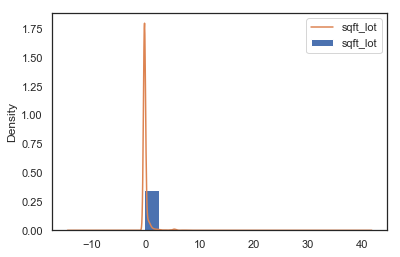

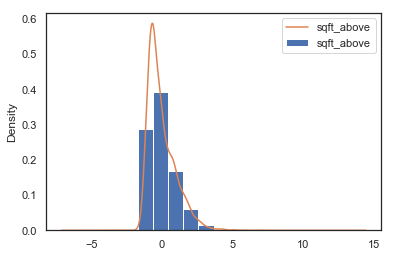

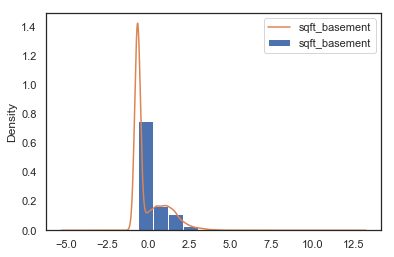

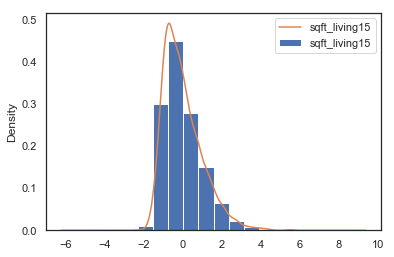

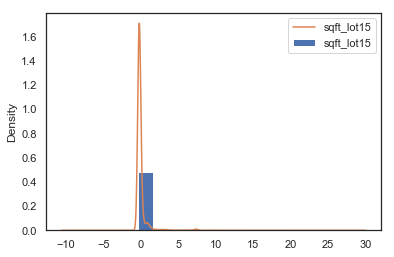

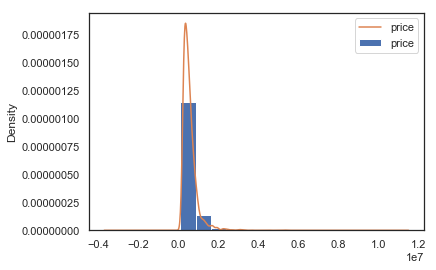

In [33]:
for column in ['sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']:
    sdf[column].plot.hist(density=True )
    sdf[column].plot.kde(label=column )
    plt.legend()
    plt.show()
    
# use only continuous variables 

Scrubbing our data seemed to worked, except for "sqft_basement" which displays some multimodality. 

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


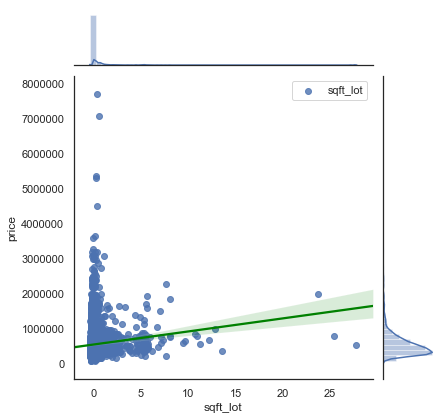

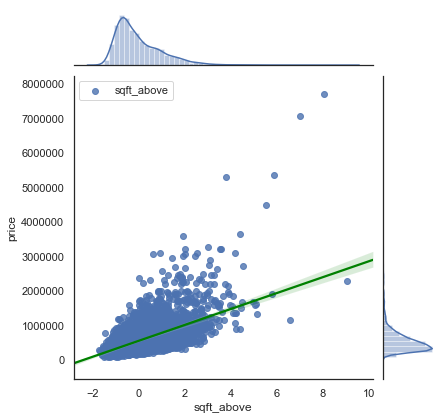

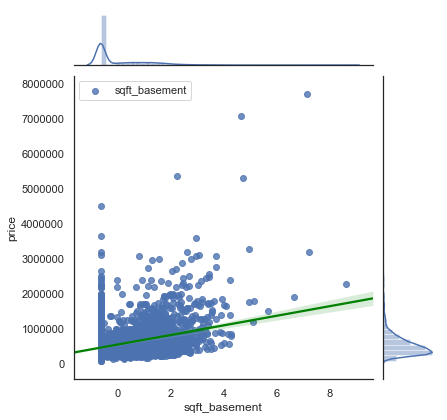

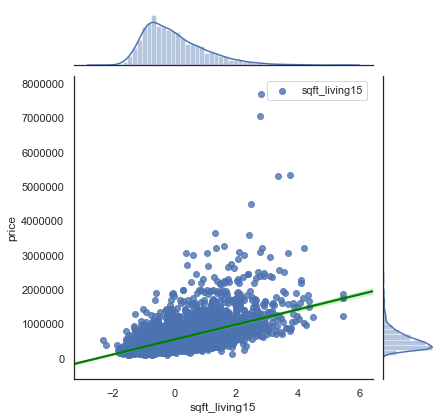

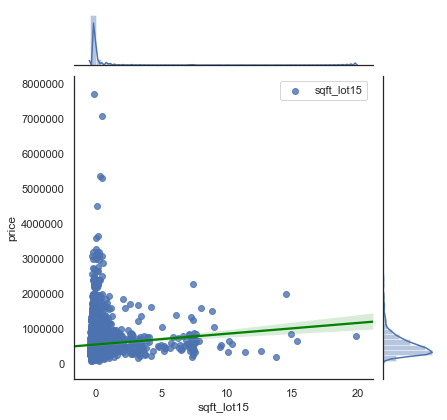

In [34]:
for column in ['sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']:
    sns.jointplot(x=column, y='price',
                  data=sdf, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

The joint plot allows us to visualize a scatterplot, the distributions of two different columns, a kde plot, and a simple regression line all on the same visualization. Based on the results, all five indicators seem to have a positive relationship with price. 

In [35]:
sdf = pd.get_dummies(sdf)
sdf.head()

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_33,...,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015
20668,630000.0,-0.059006,0.936838,1.366819,-0.372725,0.059184,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
10575,650000.0,-0.129274,0.901061,-0.649962,-0.199464,-0.112229,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1851,210000.0,-0.259921,-1.138222,0.694559,-1.166837,-0.284151,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20309,3000000.0,-0.102389,1.938591,1.546089,2.240629,-0.261112,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14111,325000.0,-0.258609,-0.899709,-0.649962,-1.109084,-0.291419,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# M: Model
An iterative process where we begin to build our regression model. 

In [51]:
sdf.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6329 entries, 20668 to 661
Data columns (total 20 columns):
price             6329 non-null float64
sqft_lot          6329 non-null float64
sqft_above        6329 non-null float64
sqft_basement     6329 non-null float64
sqft_living15     6329 non-null float64
sqft_lot15        6329 non-null float64
bedrooms_1        6329 non-null uint8
bedrooms_2        6329 non-null uint8
bedrooms_3        6329 non-null uint8
bedrooms_33       6329 non-null uint8
bedrooms_4        6329 non-null uint8
bedrooms_5        6329 non-null uint8
bedrooms_6        6329 non-null uint8
bedrooms_7        6329 non-null uint8
bedrooms_8        6329 non-null uint8
bedrooms_9        6329 non-null uint8
bathrooms_0.5     6329 non-null uint8
bathrooms_0.75    6329 non-null uint8
bathrooms_1.0     6329 non-null uint8
bathrooms_1.25    6329 non-null uint8
dtypes: float64(6), uint8(14)
memory usage: 432.6 KB


In [56]:
for cat_names in sdf.iloc[:,6:].columns:
         sdf[cat_names] = sdf[cat_names].astype('category')

In [57]:
sdf.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6329 entries, 20668 to 661
Data columns (total 20 columns):
price             6329 non-null float64
sqft_lot          6329 non-null float64
sqft_above        6329 non-null float64
sqft_basement     6329 non-null float64
sqft_living15     6329 non-null float64
sqft_lot15        6329 non-null float64
bedrooms_1        6329 non-null category
bedrooms_2        6329 non-null category
bedrooms_3        6329 non-null category
bedrooms_33       6329 non-null category
bedrooms_4        6329 non-null category
bedrooms_5        6329 non-null category
bedrooms_6        6329 non-null category
bedrooms_7        6329 non-null category
bedrooms_8        6329 non-null category
bedrooms_9        6329 non-null category
bathrooms_0.5     6329 non-null category
bathrooms_0.75    6329 non-null category
bathrooms_1.0     6329 non-null category
bathrooms_1.25    6329 non-null category
dtypes: category(14), float64(6)
memory usage: 434.0 KB


After one-hot encoding our categorical variables, I did a quick check to see their datatypes. After inspection, those categories were changed to the categorical datatype, so they could be properly integrated into our model. 

In [58]:
sdf.describe()

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,6.329000e+03,6.329000e+03,6.329000e+03,6.329000e+03,6.329000e+03,6.329000e+03
mean,5.476298e+05,1.684017e-17,1.010410e-16,-8.532351e-17,1.077771e-16,-2.245355e-17
std,3.818182e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,8.400000e+04,-3.708696e-01,-1.710652e+00,-6.499619e-01,-2.308916e+00,-4.418638e-01
25%,3.249500e+05,-2.533633e-01,-7.208244e-01,-6.499619e-01,-7.336850e-01,-2.805169e-01
50%,4.550000e+05,-1.860333e-01,-2.676504e-01,-6.499619e-01,-2.139021e-01,-1.889416e-01
75%,6.549500e+05,-1.032543e-01,5.313669e-01,5.825156e-01,5.513339e-01,-9.914692e-02
max,7.700000e+06,2.779125e+01,9.070119e+00,8.604823e+00,5.474834e+00,1.990664e+01


In [59]:
col_names = sdf.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County Houses: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=sdf).fit()
    X_new = pd.DataFrame({val: [sdf[val].min(), sdf[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County Houses: Price~sqft_lot
------------------------------
['sqft_lot', 0.009524702294383514, 547629.7859061472, 37263.386023347644, 7.184839955960445e-15]
King County Houses: Price~sqft_above
------------------------------
['sqft_above', 0.3652664862699524, 547629.7859061472, 230760.52793893253, 0.0]
King County Houses: Price~sqft_basement
------------------------------
['sqft_basement', 0.12850613285544044, 547629.7859061472, 136873.2368165506, 2.969084102090551e-191]
King County Houses: Price~sqft_living15
------------------------------
['sqft_living15', 0.3269926829315394, 547629.7859061472, 218336.13983238628, 0.0]
King County Houses: Price~sqft_lot15
------------------------------
['sqft_lot15', 0.006487630117791854, 547629.7859061472, 30753.861279211345, 1.3899853749745005e-10]


In [60]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_lot,0.0095247,547630,37263.4,7.18484e-15
2,sqft_above,0.365266,547630,230761,0
3,sqft_basement,0.128506,547630,136873,2.96908e-191
4,sqft_living15,0.326993,547630,218336,0
5,sqft_lot15,0.00648763,547630,30753.9,1.38999e-10


In [67]:
cols_bedroom= sdf.columns[6:15]
cols_bathroom = sdf.columns[16:40]
cols_floors = sdf.columns[41:46]
cols_waterfront = sdf.columns[47:49]
cols_view = sdf.columns[50:54]
cols_condition = sdf.columns[55:59]
cols_grade = sdf.columns[60:70]
cols_yr_built = sdf.columns[71:187]

cols = [cols_bedroom, cols_bathroom, cols_waterfront, cols_view, cols_condition, cols_grade, cols_yr_built]
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= sdf).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     83.43
Date:                Thu, 07 Feb 2019   Prob (F-statistic):          5.06e-147
Time:                        01:07:37   Log-Likelihood:                -89969.
No. Observations:                6329   AIC:                         1.800e+05
Df Residuals:                    6319   BIC:                         1.800e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.875e+05   1.81e+05  

SyntaxError: invalid syntax (<unknown>, line 1)

In [68]:
sdf_final = sdf.drop(["sqft_lot", "sqft_lot15"], axis=1)
sdf_final.describe()

,price,sqft_above,sqft_basement,sqft_living15
count,6.329000e+03,6.329000e+03,6.329000e+03,6.329000e+03
mean,5.476298e+05,1.010410e-16,-8.532351e-17,1.077771e-16
std,3.818182e+05,1.000000e+00,1.000000e+00,1.000000e+00
min,8.400000e+04,-1.710652e+00,-6.499619e-01,-2.308916e+00
25%,3.249500e+05,-7.208244e-01,-6.499619e-01,-7.336850e-01
50%,4.550000e+05,-2.676504e-01,-6.499619e-01,-2.139021e-01
75%,6.549500e+05,5.313669e-01,5.825156e-01,5.513339e-01
max,7.700000e+06,9.070119e+00,8.604823e+00,5.474834e+00


"sqft_lot" and "sqft_lot15" were dropped because they resulted with R-squared values of < 0.01 in the single linear models. 

In [69]:
y = sdf_final[["price"]]
X = sdf_final.drop(["price"], axis=1)
X.head()

,sqft_above,sqft_basement,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,...,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015
20668,0.936838,1.366819,-0.372725,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10575,0.901061,-0.649962,-0.199464,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1851,-1.138222,0.694559,-1.166837,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20309,1.938591,1.546089,2.240629,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14111,-0.899709,-0.649962,-1.109084,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [71]:
r_list = []
adj_r_list = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.105638
dtype: float64
price    0.078854
dtype: float64
price    0.112301
dtype: float64
price    0.085716
dtype: float64
price    0.376461
dtype: float64
price    0.357787
dtype: float64
price    0.623547
dtype: float64
price    0.612273
dtype: float64
price    0.633222
dtype: float64
price    0.622238
dtype: float64
price    0.639247
dtype: float64
price    0.628443
dtype: float64
price    0.642538
dtype: float64
price    0.631833
dtype: float64
price    0.646882
dtype: float64
price    0.636307
dtype: float64
price    0.651798
dtype: float64
price    0.64137
dtype: float64


Feature ranking with recursive feature elimination. Seems to be going up as we include more features. 

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    1.323430e+11
dtype: float64
price    1.224975e+11
dtype: float64
price    1.251704e+11
dtype: float64
price    1.169762e+11
dtype: float64
price    1.045181e+11
dtype: float64
price    9.236164e+10
dtype: float64
price    1.019809e+11
dtype: float64
price    5.977452e+32
dtype: float64
price    5.551662e+10
dtype: float64
price    2.173861e+33
dtype: float64
price    5.359195e+10
dtype: float64
price    3.341338e+32
dtype: float64
price    5.154633e+10
dtype: float64
price    8.274031e+33
dtype: float64
price    5.052819e+10
dtype: float64
price    5.781304e+33
dtype: float64
price    4.980436e+10
dtype: float64
price    4.479524e+33
dtype: float64


Feature ranking with recursive feature elimination with a train-test-split. But this time we are looking at Mean Squared Error(MSE) instead of R-squared and adjusted R-squared. 

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# select 85 best predictors

select_85 = RFE(linreg, n_features_to_select = 85)
select_85 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-1.33702636e+11, -1.09815789e+11, -1.03699207e+11, -1.44349673e+11,
       -1.07604120e+11, -1.06496379e+11, -5.21928725e+37, -1.60368798e+11,
       -1.00933264e+11, -1.75165269e+11])

10-fold cross validation with the final model